In [2]:
%matplotlib inline

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import cv2
import os

### Loading images, Checking dimensions

In [14]:
! ls 

eigenfaces.ipynb faculty_pics     student_pics


Loading the pictures. We have 2 directories. 1 has all of USF MSAN's faculty headshots, other has student's headshots. 

In [10]:
path = '/Users/princegrover/Documents/msan/compstats/pca/'

In [66]:
student_pic_list = os.listdir(path + 'student_pics')
faculty_pic_list = os.listdir(path + 'faculty_pics')

In [67]:
len(student_pic_list), len(faculty_pic_list) # num students, num faculty

(79, 13)

In [68]:
student_pic_list[:2]

['msan-student-avgerinou-danai.jpg', 'msan-student-bowers-devin.jpg']

In [69]:
# shape of random student pic

plt.imread(path + 'student_pics/' + student_pic_list[1]).shape

(150, 150, 3)

In [70]:
# shape of random facult pic

plt.imread(path + 'faculty_pics/' + faculty_pic_list[1]).shape

(500, 500, 3)

Checking if dimension for all images in these 2 folders is same

In [109]:
# check if dimention of all images in student is same

i = 0
for st in range(len(student_pic_list)):
    arr = plt.imread(path + 'student_pics/' + student_pic_list[st])
    if (arr.shape[0] == 150) and (arr.shape[1] == 150):
        i += 1
assert i == len(student_pic_list)

In [111]:
# check if dimention of all images in faculty is same

i = 0
for st in range(len(faculty_pic_list)):
    arr = plt.imread(path + 'faculty_pics/' + faculty_pic_list[st])
    if (arr.shape[0] == 500) and (arr.shape[1] == 500):
        i += 1
assert i == len(faculty_pic_list)

In [71]:
student_pic_list[1]

'msan-student-bowers-devin.jpg'

In [103]:
# funciton to plot 4 pictures in 1 row 

def plot_4_pics(dir_lst, dr):
    """
    Displays 4 random images from a directory of images
    
    dir_lst: list of image paths from where we want to show images
    dr: student_pics or faculty_pics
    
    """
    
    fig, ax = plt.subplots(ncols=4, nrows=1, figsize = (12,5))
    
    # random 4 pictures from list
    np.random.seed(10)
    idxs = np.random.randint(0, len(dir_lst), 4)
    
    for i,idx in enumerate(idxs):
        p = path + dr + dir_lst[idx]
        img_ar = plt.imread(p)
        ax[i].imshow(img_ar)
        
        fig.suptitle(dr, y = 0.85, fontsize=15)
        fig.tight_layout()

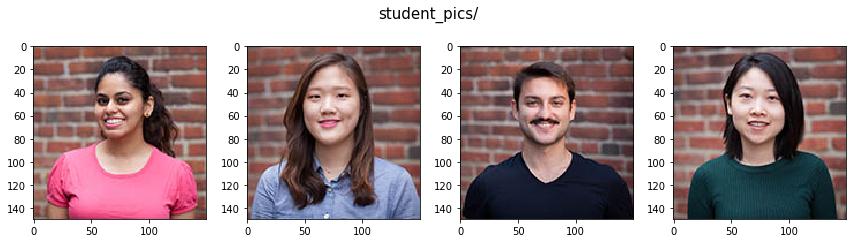

In [104]:
plot_4_pics(student_pic_list, 'student_pics/')

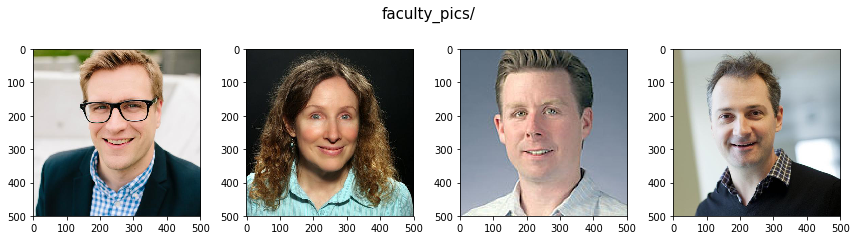

In [105]:
plot_4_pics(faculty_pic_list, 'faculty_pics/')

### Image pre-processing

#### Resizing images

Since all faculty images are 500x500 and we would like to have same dimension for all images. Resizing it. 

In [139]:
def resize(in_dir, out_dir, file_list , sz):
    """
    Resized all images from input directory to given sz and saves into output directory
    
    in_dir: path to input dir
    out_dir: path to output dir
    file_list: list of image paths to be resized
    sz: final size needed 
    
    """
    
    os.makedirs(out_dir, exist_ok=True) # create empty out_dir if not exist already
    
    for pic in file_list:
        ar  = cv2.imread(in_dir + pic)
        ar_out = cv2.resize(ar, (150,150))       
        cv2.imwrite(out_dir + pic, ar_out)

In [127]:
in_dir = path + 'faculty_pics/'
out_dir = path + 'resized_faculty_pics/'
resize(in_dir, out_dir, faculty_pic_list, 150)

In [129]:
resized_faculty_pic_list = os.listdir(path + 'resized_faculty_pics/')

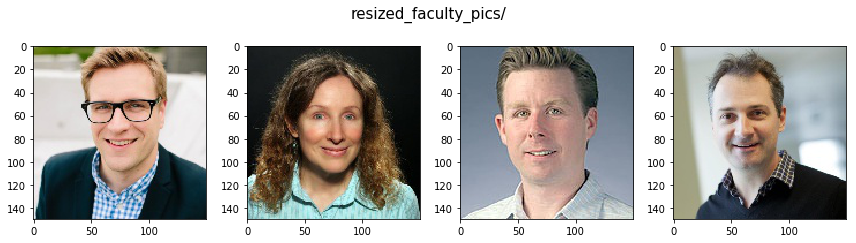

In [130]:
plot_4_pics(resized_faculty_pic_list, 'resized_faculty_pics/')

#### Cropping faces 
Code borrowed from http://gregblogs.com/computer-vision-cropping-faces-from-images-using-opencv2/

In [136]:
def facechop(in_dir, out_dir, file_lst):  
    """
    
    """
    os.makedirs(out_dir, exist_ok=True)

    facedata = "haarcascade_frontalface_default.xml"
    cascade = cv2.CascadeClassifier(facedata)
    
    for i in file_lst:
        image = in_dir + i  # actual path of the image
        img = cv2.imread(image)
        faces = cascade.detectMultiScale(img)

        for f in faces:
            x, y, w, h = [ v for v in f ]
            cv2.rectangle(img, (x,y), (x+w,y+h), (255,255,255))

            sub_face = img[y:y+h, x:x+w]
            face_file_name = out_dir + str(y) + str(i)+ ".jpg"
            cv2.imwrite(face_file_name, sub_face)

        cv2.imshow(image, img)
    return None

In [137]:
# cropping faculty faces 

in_dir = path + 'resized_faculty_pics/'
out_dir = path + 'crop_faculty_pics/'
facechop(in_dir, out_dir, resized_faculty_pic_list)

Let's see how it looks like 

In [141]:
crop_faculty_pic_list = os.listdir(path + 'crop_faculty_pics/')

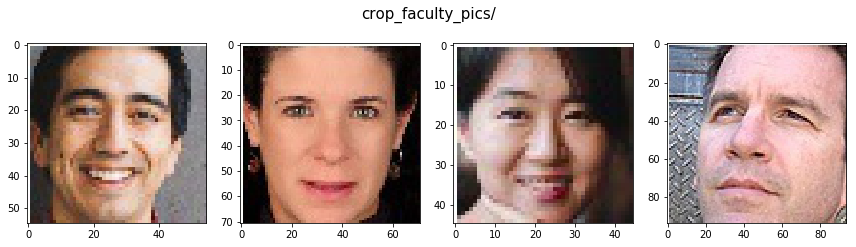

In [142]:
plot_4_pics(crop_faculty_pic_list, 'crop_faculty_pics/')

#### Aligning and cropped faces 

Eigen faces would give good results without aligning faces 